<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

## Background

The t-distribution (also known as the student's t-distribution) is a continuous probability distributions that emerged when estimating the mean of normally distributed populations when sample size was small and population standard deviation unknown [1]. The t distribution is very similar to the normal distribution but has heavier tells, thats to say that there is a higher probability of finding values further out at of the t-distribution (potential outliers). See plot below for visual difference between t-distribtions at varying degrees of freedom and the z (normal distribution). From the plot one can see the t kde plots more closely allign to that of the z kde plot when the number of values that have the freedom to vary increase. 

<br>

The T-test is typically used in hypothesis testing when comparing the means of two groups to establish how signifcant the difference (if any) between the groups of interest. As described by Mahima S (2021), some t-test assumptions need to be met to conduct a test:
- Samples should be independant random sampels from a population (no bias).
- Standard devation is unknown, if someone knew this they would typically conduct a z-test.
- Sample sizes should be low (<30) as larger sampels sizes (or degrees of freedom) tend towards a nomral distribution.

In [27]:
# import libraries
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Mains statistics package.
import scipy.stats as ss

# for normal distrubtion functions
from scipy.stats import norm

# Efficient numerical arrays.
import numpy as np

# for basic math operations
import math

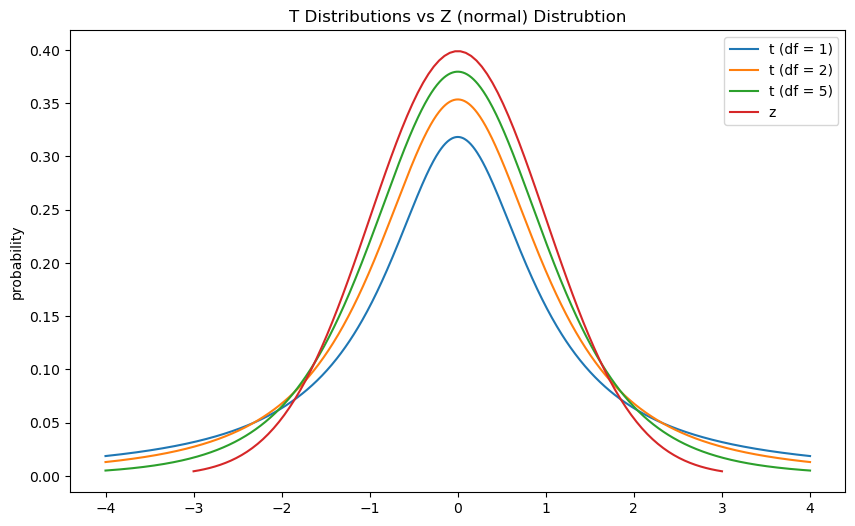

In [51]:
# get x-axis values
x_t = np.linspace(-4.0, 4.0, 1000)

# degrees of freedom for plot t curves
dflow, dfmid, dfhigh = 1, 2, 5

# leverage probability density function to return t value probabilites 
t1 = ss.t.pdf(x_t, dflow)
t2 = ss.t.pdf(x_t, dfmid)
t3 = ss.t.pdf(x_t, dfhigh)

# normal distributed code adopted from:
# https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
mean, variance = 0, 1
sigma = math.sqrt(variance)
x = np.linspace(mean - 3 * sigma, mean + 3 * sigma, 100)

# plot code...
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_t, t1, label = 't (df = 1)')
ax.plot(x_t, t2, label = 't (df = 2)')
ax.plot(x_t, t3, label = 't (df = 5)')
plt.plot(x, ss.norm.pdf(x, mean, sigma), label = 'z')
plt.title('T Distributions vs Z (normal) Distrubtion')
plt.ylabel('probability')
plt.legend();

## Documentation:

The scipy library allows us to test if two 2 independent samples have identical average values (i.e: the Null Hypothesis = True). Lets explore the arguements and return parameters of the function and look at some data.

### Important arguments:
- ***Two value arrays*** of the same shape. 
<br>

- ***equal_var***: By Default this parameter is set to true, meaning the test will assume that each sample has equal variance
One can change it to false to drop this assumption and perform the  Welch’s t-test. Welch’s test (described on [wiki](https://en.wikipedia.org/wiki/Welch%27s_t-test#:~:text=These%20tests%20are%20often%20referred,being%20compared%20are%20non%2Doverlapping.)) is typically used to test two samples whose distrubtion is not over-lapping, which makes sense as overlapping distributions are more likely to have equal variance. See below for the Formula's below for both t-tests. 
    - Formula1 has a pooled standard deviation value (Sp) and for this reason this formula makes the assumption that both populations have equal variances.
    - Formula 2 on the other hand doesnt pool the esimators of the variance together, taking the degree of freedom of each population into consideration. 
<br><br>

- ***permutations=None***: By default this calculates the p-value by comaring the t-value to a theoretical t-distribution.
Alternatively one can generate the distribution from the data by per.. more on this
<br>


![t_test_eq_var](https://latex.codecogs.com/svg.latex?\Large&space;Formula1:t_{equalVar}=\frac{\bar{X_1}-\bar{X_2}}{S_p\sqrt{\frac{2}{n}})

<br>

![t_test__uneq_var](https://latex.codecogs.com/svg.latex?\Large&space;Formula2:t_{equalVar}=\frac{\bar{X_1}-\bar{X_2}}{\sqrt{\{s^2}_{\bar{X_1}}+{s^2}_{\bar{X_2}})

 
$\bar{X_1}$ = Mean of sample 1 <br> <br>
$\bar{X_2}$ = Mean of sample 2 <br> <br>
$\bar{S_p}$ = Pooled standard deviation<br> <br>
$S_{\bar{X}}$ = Standard Error<br> <br>


<br>

<h3>References:</h3>

[1]. Wikipedia, available at:
[Ref Link](https://en.wikipedia.org/wiki/Student%27s_t-distribution) (Viewed 14 October 2022).

[1]. S, Mahima, 2021, A complete guide to the T-test, one of the Hypothesis tests, available at:
[Ref Link](https://medium.com/geekculture/a-complete-guide-to-the-t-test-one-of-the-hypothesis-tests-6a72d741957e) (Viewed 14 October 2022).
